In [33]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Paths to dataset
DATASET_PATH = 'COVID19-DATASET/'
TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VALID_DIR = os.path.join(DATASET_PATH, 'valid')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

# Hyperparameters
BATCH_SIZE = 256
IMAGE_SIZE = (224, 224)
EPOCHS = 10

# 1. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=IMAGE_SIZE, 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(VALID_DIR, 
                                                    target_size=IMAGE_SIZE, 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(TEST_DIR, 
                                                  target_size=IMAGE_SIZE, 
                                                  batch_size=BATCH_SIZE, 
                                                  class_mode='binary')

# 2. Load Pre-trained ResNet50 (Replacing ResNet18 with ResNet50 from Keras)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation= 'relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# 3. Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])



Found 8975 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [34]:
# 4. Train the Model
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=EPOCHS)


Epoch 1/10
36/36 [==============================] - 827s 23s/step - loss: 15.6987 - accuracy: 0.5115 - val_loss: 1.4878 - val_accuracy: 0.4000
Epoch 2/10
36/36 [==============================] - 814s 23s/step - loss: 0.6913 - accuracy: 0.5876 - val_loss: 0.6723 - val_accuracy: 0.4140
Epoch 3/10
36/36 [==============================] - 618s 17s/step - loss: 0.5594 - accuracy: 0.6987 - val_loss: 0.3964 - val_accuracy: 0.8700
Epoch 4/10
36/36 [==============================] - 484s 13s/step - loss: 0.5132 - accuracy: 0.7404 - val_loss: 0.3009 - val_accuracy: 0.9340
Epoch 5/10
36/36 [==============================] - 478s 13s/step - loss: 0.5076 - accuracy: 0.7354 - val_loss: 0.4005 - val_accuracy: 0.8460
Epoch 6/10
36/36 [==============================] - 479s 13s/step - loss: 0.4902 - accuracy: 0.7514 - val_loss: 0.2820 - val_accuracy: 0.9480
Epoch 7/10
36/36 [==============================] - 485s 13s/step - loss: 0.4808 - accuracy: 0.7643 - val_loss: 0.2380 - val_accuracy: 0.9520
Epoch

In [36]:
# 5. Save the Fine-tuned Model
model.save('model/resnet50_finetuned.h5')

2/2 [==============================] - 13s 276ms/step - loss: 0.5127 - accuracy: 0.7923
Test Loss: 0.5127336382865906, Test Accuracy: 0.7923076748847961


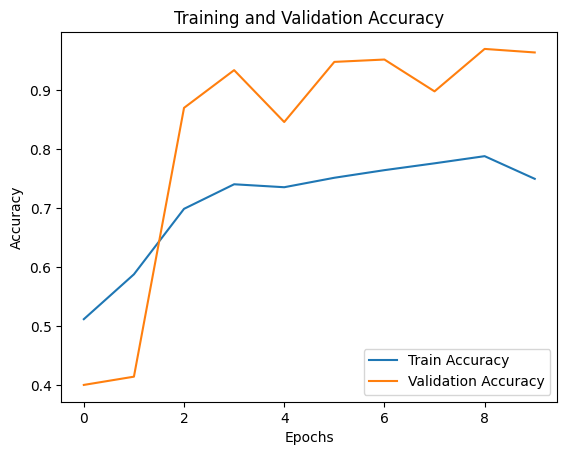

In [37]:
# 6. Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# 7. Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('evaluation_results.png')
plt.show()